In [1]:
from maml import *
import matplotlib.pyplot as plt
import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [11]:
savename = 'maml_burgers_fixed_tasks_from_zs_1000'

In [12]:
# maml = MAML(5, 0.01, 0.0005, 0, 2, 1, -1, 1, eqname='poisson', zero_shot=True, load=False, modelpath='models/poisson_zs_2000_ref.data')
maml = MAML(5, 0.01, 0.0005, 1, 2, 1, -1, 1, eqname='burgers', zero_shot=True, load=True, modelpath='models/model_ref/burgers_zs_1000_ref.data', savename=savename)
# maml = MAML(5, 0.01, 0.0001, 0, 2, 1, low=-1, high=1, eqname='poisson')

train_loss, val_loss, val_ood_loss, nrmse, model = maml.train(5000, 100, 5)

Initializing MAML-PINN model
Current device:  cuda
Model loaded successfully from models/model_ref/burgers_zs_1000_ref.data
cuda
Zero shot mode is True
Finished initialization of MAML-PINN model
Trained model will be saved by maml_burgers_fixed_tasks_from_zs_1000
Start MAML training at iteration 0
[(0.026938222401708515, 0.01905633043726401), (0.005853049433870988, 0.0308045556249356), (0.008149920728224295, 0.0187823570130843), (0.009201006187684223, 0.011202673860586605), (0.0029383425852788493, 0.006295024504961075)]
[(0.05385337068840348, 0.059071320472452546), (0.03659217047999726, 0.053206078261160264), (0.03202196354295455, 0.04065281443636018), (0.06111906554026576, 0.0436082196758417), (0.0004683950015234781, 0.0011800103713764732)]
Validation before training Pre-Adaptation (0.019)| Inner_loss_I: 0.0007 | Inner_loss_B: 0.0004 | Inner_loss_F: 15.5329 | Inner_loss: 15.5340 | NRMSE: 0.1202
Validation before training (0.019)| Inner_loss_I: 0.1369 | Inner_loss_B: 0.0048 | Inner_los

In [13]:
import pandas as pd

nrmse_df = pd.DataFrame(nrmse)
val_loss_df = pd.DataFrame(val_loss)
val_ood_loss_df = pd.DataFrame(val_ood_loss)
train_loss_df = pd.DataFrame(train_loss)

nrmse_df.to_csv('data/nrmse_burgers_from_zs_maml.csv')
val_loss_df.to_csv('data/val_loss_burgers_from_zs_maml.csv')
val_ood_loss_df.to_csv('data/val_ood_loss_burgers_from_zs_maml.csv')
train_loss_df.to_csv('data/train_loss_burgers_from_zs_maml.csv')

In [14]:
import pandas as pd
nrmse_df = pd.read_csv('data/nrmse_burgers_from_zs_maml.csv')
val_loss_df = pd.read_csv('data/val_loss_burgers_from_zs_maml.csv')
val_ood_loss_df = pd.read_csv('data/val_ood_loss_burgers_from_zs_maml.csv')
train_loss_df = pd.read_csv('data/train_loss_burgers_from_zs_maml.csv')

Text(0.5, 1.0, 'Post-adapt validation losses (in-distribution)')

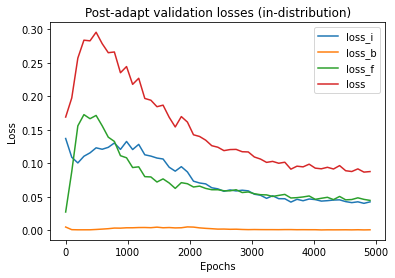

In [28]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss_i']), label='loss_i')
plt.plot(x, np.array(val_loss_df['inner_loss_b']), label='loss_b')
plt.plot(x, np.array(val_loss_df['inner_loss_f']), label='loss_f')
plt.plot(x, np.array(val_loss_df['inner_loss']), label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Post-adapt validation losses (in-distribution)')

Text(0.5, 1.0, 'Pre-adapt validation losses (in-distribution)')

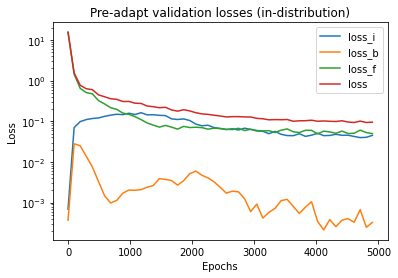

In [29]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss_i_pre_adapt']), label='loss_i')
plt.plot(x, np.array(val_loss_df['inner_loss_b_pre_adapt']), label='loss_b')
plt.plot(x, np.array(val_loss_df['inner_loss_f_pre_adapt']), label='loss_f')
plt.plot(x, np.array(val_loss_df['inner_loss_pre_adapt']), label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Pre-adapt validation losses (in-distribution)')

Text(0.5, 1.0, 'Pre-adapt vs post-adapt validation losses (in-distribution)')

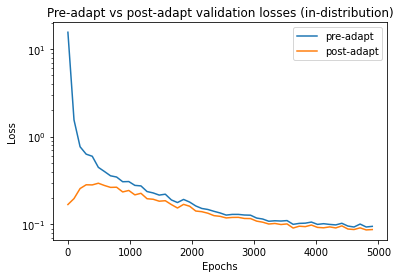

In [30]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(val_loss_df['inner_loss']), label='post-adapt')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Pre-adapt vs post-adapt validation losses (in-distribution)')

In [ ]:
data_len = len(nrmse_df['nrmse_val'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(nrmse_df['nrmse_val_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(nrmse_df['nrmse_val']), label='post-adapt')
# plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('NRMSE')
plt.legend()
plt.title('Validation metrics (in-distribution)')

Text(0.5, 1.0, 'Post-adapt validation losses (out-of-distribution)')

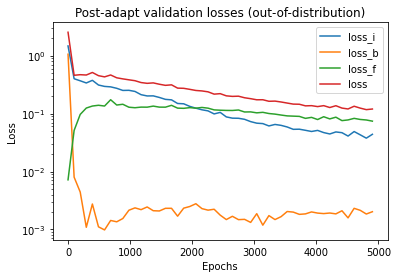

In [32]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss_i']), label='loss_i')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_b']), label='loss_b')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_f']), label='loss_f')
plt.plot(x, np.array(val_ood_loss_df['inner_loss']), label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Post-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Pre-adapt validation losses (out-of-distribution)')

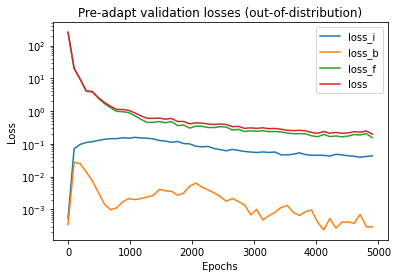

In [31]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss_i_pre_adapt']), label='loss_i')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_b_pre_adapt']), label='loss_b')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_f_pre_adapt']), label='loss_f')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_pre_adapt']), label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Pre-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Pre-adapt vs post-adapt validation losses (out-of-distribution)')

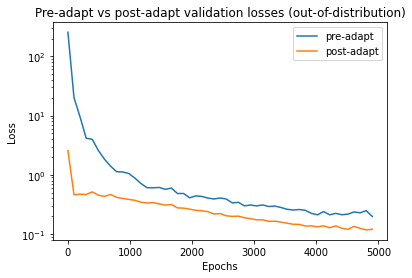

In [33]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(val_ood_loss_df['inner_loss']), label='post-adapt')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Pre-adapt vs post-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Validation metrics (out-of-distribution)')

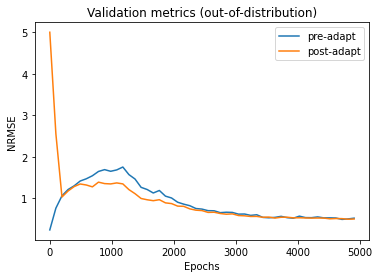

In [34]:
data_len = len(nrmse_df['nrmse_val'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(nrmse_df['nrmse_val_ood_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(nrmse_df['nrmse_val_ood']), label='post-adapt')
# plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('NRMSE')
plt.legend()
plt.title('Validation metrics (out-of-distribution)')

In [ ]:
plt.plot(np.array(nrmse['nrmse_val_pre_adapt']))
plt.plot(np.array(nrmse['nrmse_val']))
plt.yscale('log')
# plt.plot(np.array(val_loss['inner_loss'])[:, -1])

In [ ]:
model = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model.load_state_dict(torch.load('models/poisson_zs_5000_ref.data'))
model.to(device)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)
test_x = np.linspace(-10, 10, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
test_alpha = np.full((100, 1), -0.830)
test_beta = np.full((100, 1), -0.617)
test_in = np.hstack((test_x, test_alpha, test_beta))
test_u = model(torch.Tensor(test_in).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X



In [ ]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X, C, label='PINN')
plt.scatter(X, Y, label='Answer')
plt.legend()
plt.colorbar()

In [ ]:
np.sqrt( np.sum((C-Y)**2) / np.sum(C**2) )

In [ ]:
# steps = [ 1000 / len(val_loss['inner_loss']) * i for i in range(len(val_loss['inner_loss']))]
# idx = [100 * i for i in range(10)]
# loss = train_loss['inner_loss_f'][::100]
# plt.plot(val_loss['inner_loss'], label='loss')
plt.plot(np.mean(nrmse['nrmse_val'], axis=1), label='Val.')
plt.plot(np.mean(nrmse['nrmse_val_ood'], axis=1), label='Val. OOD')
plt.legend()
plt.title('FO-MAML Val. Poisson')
# plt.plot( loss)
# plt.plot(nrmse['nrmse_val'])
# plt.plot(nrmse['nrmse_val_ood'])
# plt.plot(train_loss['inner_loss'])

In [ ]:
from train import *

In [ ]:
epochs = 500
lr = 0.001

In [ ]:
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse_set = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=1000, zero_shot=False, load=True, load_data='models/maml_burgers_5000.data', alpha_list=0.01 / np.pi, eqname='burgers')
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse_set = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=10, zero_shot=False, load=True, load_data='maml.data', alpha_list=0.7, beta_list=-0.9, eqname='poisson')

In [ ]:
# loss_i_2, loss_b_2, loss_f_2, loss_2, model_2, val_loss_2, val_ood_loss_2, nrmse_set_2 = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=1000, zero_shot=False, load=False, load_data='maml.data', alpha_list=0.01 / np.pi, eqname='burgers')
loss_i_2, loss_b_2, loss_f_2, loss_2, model_2, val_loss_2, val_ood_loss_2, nrmse_set_2 = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=10, zero_shot=False, load=False, load_data='maml.data', alpha_list=0.7, beta_list=-0.9, eqname='poisson')

In [ ]:
plt.title('Loss Few shot')
plt.yscale('log')
plt.plot(loss, label='MAML')
plt.plot(loss_2, label='Random')
plt.legend()

In [ ]:
plt.title('Relative error Few shot')
plt.yscale('log')
plt.plot(nrmse_set, label='MAML')
plt.plot(nrmse_set_2, label='Random')
plt.legend()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
test_alpha = np.full((100, 1), 0.7)
test_beta = np.full((100, 1), 0.7)
# test_in = np.hstack((test_x, test_alpha, test_beta))
test_u = model_2(torch.Tensor(test_x).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X


In [ ]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X, C, label='PINN')
plt.scatter(X, Y, label='Answer')
plt.legend()
plt.colorbar()

In [ ]:
plt.plot(loss)
plt.plot(loss_2)

In [ ]:
from burgers import *

In [ ]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)

vu = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt)

x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)

plt.scatter(x, t, c=vu, cmap='seismic')
plt.colorbar()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

In [ ]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)
x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)
alpha = np.full((x.shape), nu)
# pred = model_2(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()
pred = model(torch.Tensor(np.hstack((x, t, alpha))).to(device)).detach().cpu().numpy()
truth = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt).T.reshape(-1, 1)

In [ ]:
task = 0.01 / np.pi
test_in = np.hstack((x, t, alpha))
test_in_t = np.hstack((x_t, t_t, np.full((x_t.shape), task)))
phi, _, _, _, _, _, _ = model_adapted=maml._inner_loop(model.state_dict(), task, train=True)
model_adapted = deepcopy(model)
model_adapted.load_state_dict(phi)
Y2 = model_adapted(torch.Tensor(test_in).to(device)).detach().cpu().numpy()
Y2_t = model_adapted(torch.Tensor(test_in_t).to(device)).detach().cpu().numpy()

In [ ]:
plt.scatter(x, t, c=Y2, cmap='seismic')
plt.colorbar()

In [ ]:
plt.scatter(x, t, c=pred, cmap='seismic')
plt.colorbar()

In [ ]:
plt.scatter(x, t, c=truth, cmap='seismic')
plt.colorbar()

In [ ]:
idx = 100
truth_t = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt).T[idx, :]
x_t = np.linspace(-1, 1, 101).reshape(-1, 1)
t_t = np.full((x_t.shape), idx / 100)
pred_t = model(torch.Tensor(np.hstack((x_t, t_t, np.full((x_t.shape), nu)))).to(device)).detach().cpu().numpy()
Y2_t = model_adapted(torch.Tensor(np.hstack((x_t, t_t, np.full((x_t.shape), nu)))).to(device)).detach().cpu().numpy()
plt.plot(x_t, truth_t, 'r--', label='truth')
plt.plot(x_t, pred_t, 'b-', label='PINN')
plt.plot(x_t, Y2_t, 'g--', label='adapted')
plt.legend()